# Churn Projesi
## Problem & Amaç: 

**Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli geliştirmek**

- Amaç bir bankanın müşterilerinin bankayı terk etme ya da terk etmeme durumunun tahmin edilmesidir.

- Müşteri terkini tanımlayan olay müşterinin banka hesabını kapatmasıdır.

**Veri Seti Hikayesi:**

- 10000 gözlemden ve 12 değişkenden oluşmaktadır. 
- Bağımsız değişkenler müşterilere ilişkin bilgiler barındırmaktadır.
- Bağımlı değişken müşteri terk durumunu ifade etmektedir.

**Değişkenler:**

- Surname : Soy isim 
- CreditScore : Kredi skoru 
- Geography : Ülke (Germany/France/Spain) 
- Gender : Cinsiyet (Female/Male) 
- Age : Yaş  
- Tenure : Kaç yıllık müşteri 
- Balance : Bakiye 
- NumOfProducts : Kullanılan banka ürünü
- HasCrCard : Kredi kartı durumu (0=No,1=Yes) 
- IsActiveMember : Aktif üyelik durumu (0=No,1=Yes)
- EstimatedSalary : Tahmini maaş
- Exited : Terk mi değil mi? (0=No,1=Yes)


# Data Understanding

In [10]:
#kütüphaneler import edilmiştir.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); 
pd.set_option('display.max_rows', None);



In [11]:
#read the dataset
df = pd.read_csv("churn.csv",index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
#general information 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [13]:
#size of shape
df.shape

(10000, 13)

# Data Preprocessing

In [14]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15591167.10,15628528.25,1.569074e+07,1.575323e+07,1.579083e+07,1.580303e+07,1.581311e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,521.00,584.00,6.520000e+02,7.180000e+02,7.780000e+02,8.120000e+02,8.500000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,27.00,32.00,3.700000e+01,4.400000e+01,5.300000e+01,6.000000e+01,7.200000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,1.00,3.00,5.000000e+00,7.000000e+00,9.000000e+00,9.000000e+00,1.000000e+01,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,0.00,9.719854e+04,1.276442e+05,1.492448e+05,1.627117e+05,1.859680e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,20273.58,51002.11,1.001939e+05,1.493882e+05,1.796747e+05,1.901554e+05,1.980697e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00


In [15]:
df["Exited"].value_counts()*100/len(df)

0    79.63
1    20.37
Name: Exited, dtype: float64

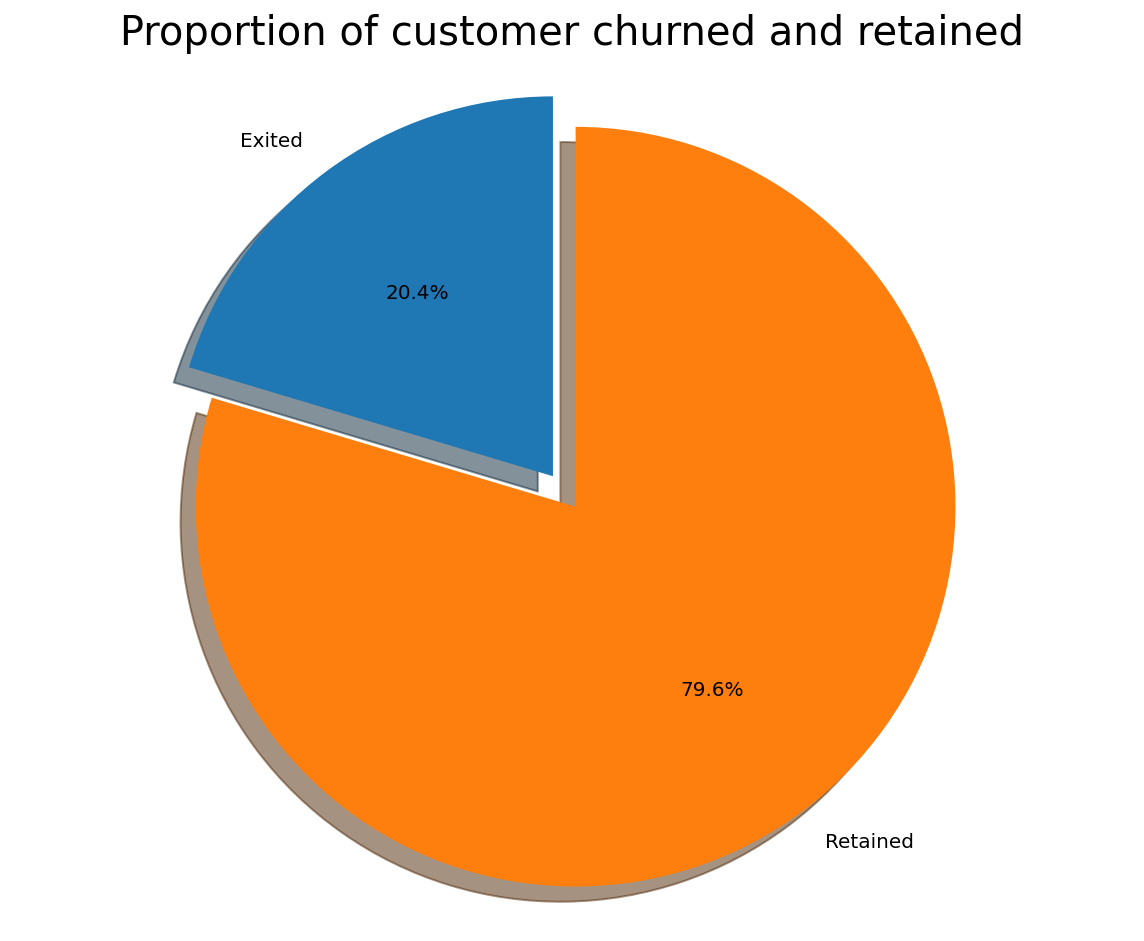

In [16]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

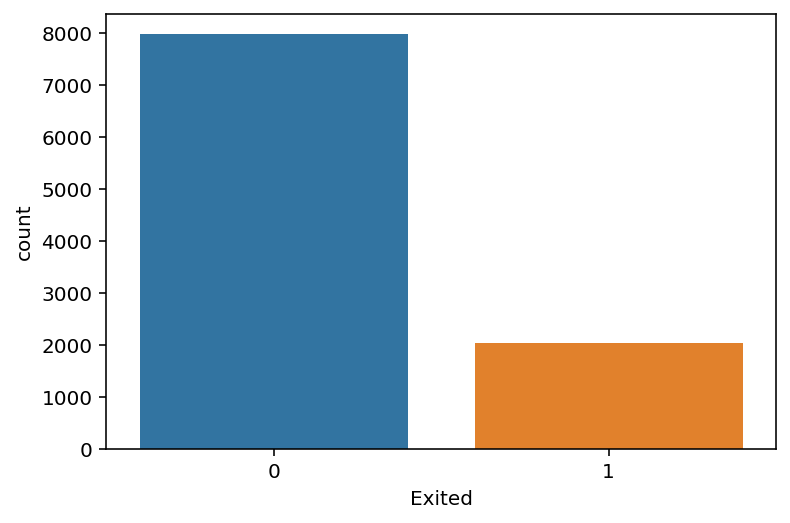

In [17]:
#display the graphic 
sns.countplot(x = 'Exited', data = df);


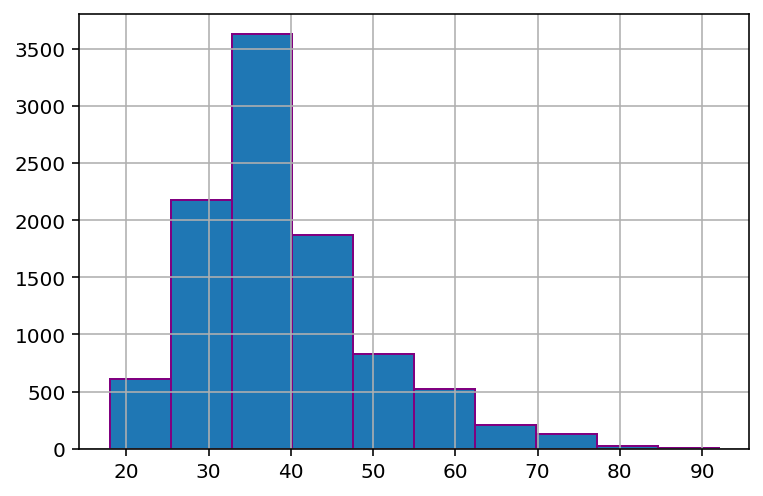

In [18]:
df["Age"].hist(edgecolor = "purple");

In [19]:
df.groupby("Exited").agg({"HasCrCard":"mean", "Tenure":"mean", "Balance":"mean"})

,HasCrCard,Tenure,Balance
Exited,,,
0,0.707146,5.033279,72745.296779
1,0.699067,4.932744,91108.539337


In [20]:
df.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


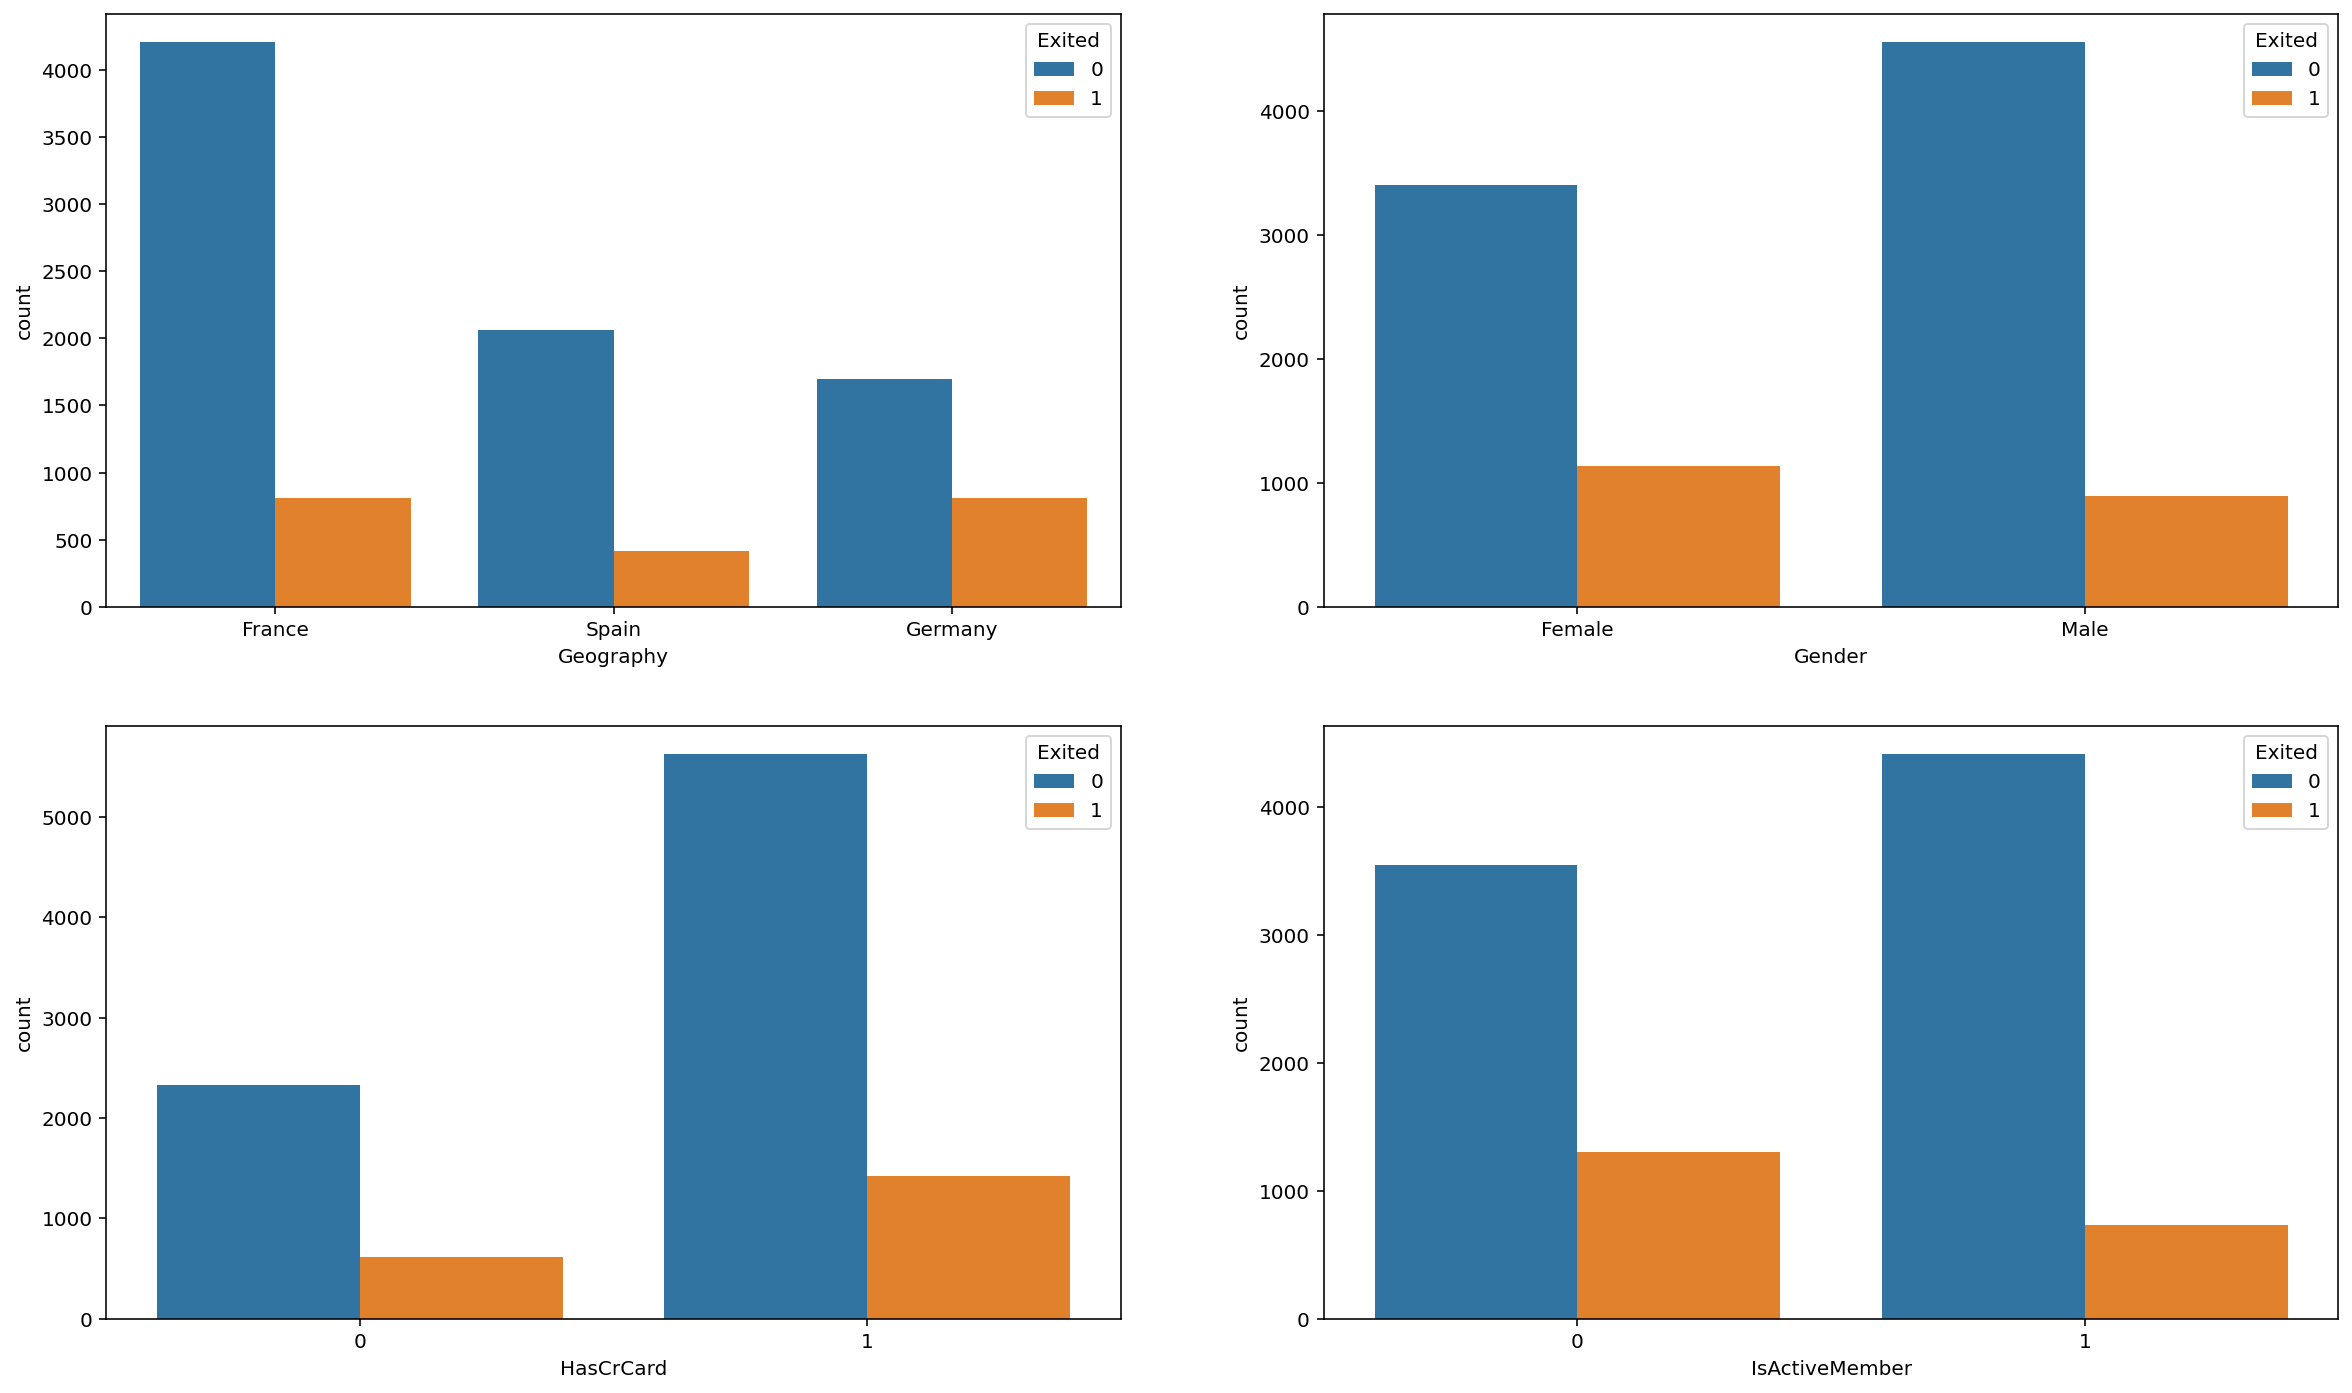

In [21]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

In [22]:
def summary(x):
    x_min = df[x].min()
    x_max = df[x].max()
    Q1 = df[x].quantile(0.25)
    Q2 = df[x].quantile(0.50)
    Q3 = df[x].quantile(0.75)
    x_mean = df[x].mean()
    print(f'6 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min)   : {x_min}\n'
          f'Q1                      : {Q1}\n'
          f'Q2(Median)              : {Q2}\n'
          f'Q3                      : {Q3}\n'
          f'{x.capitalize()}(max)   : {x_max}\n'
          f'{x.capitalize()}(mean)  : {round(x_mean)}')

    fig = plt.figure(figsize=(15, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(df[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.boxplot(x=df[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    
    plt.show()

6 Point Summary of Age Attribute:
Age(min)   : 18
Q1                      : 32.0
Q2(Median)              : 37.0
Q3                      : 44.0
Age(max)   : 92
Age(mean)  : 39.0


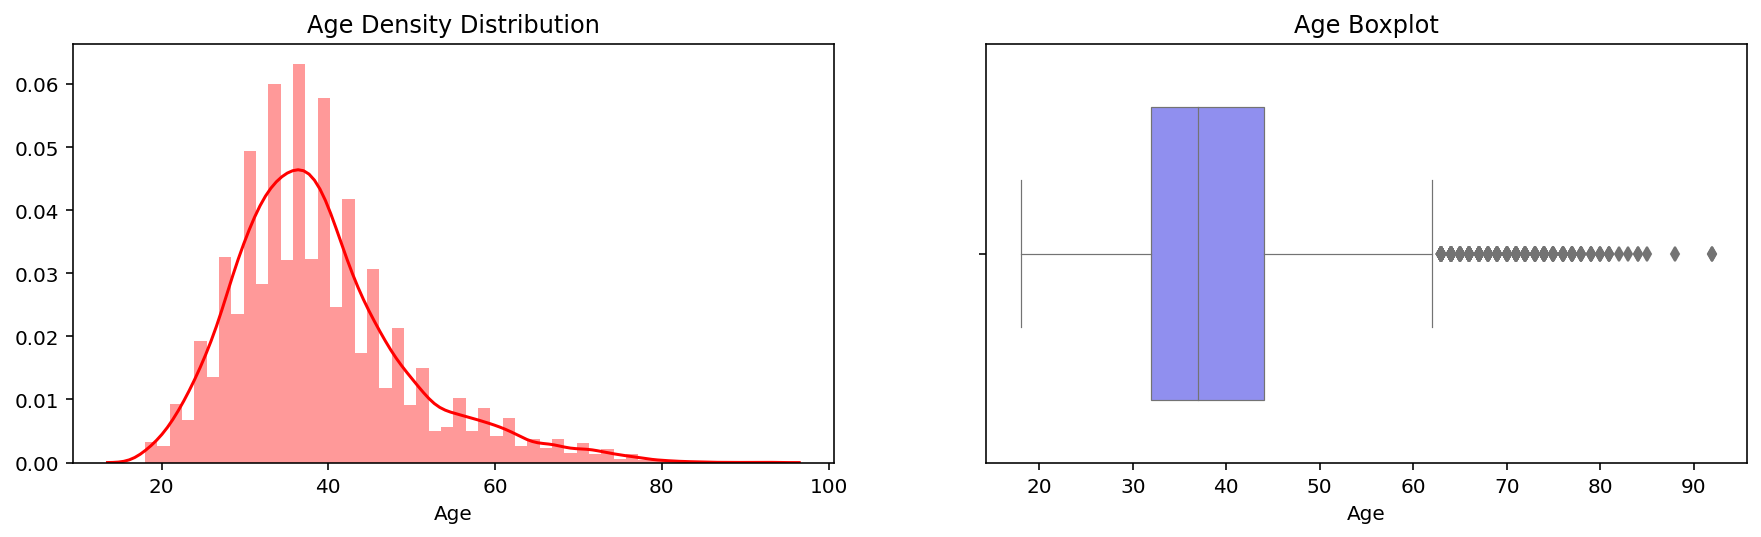

In [23]:
summary('Age')

In [24]:
# object değişkenleri kategorik yaptık.
df.Surname= pd.Categorical(df.Surname)
df.Geography = pd.Categorical(df.Geography)
df.Gender = pd.Categorical(df.Gender)

## Missing Values

In [32]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Outliers

In [33]:
df = df.drop(["CustomerId","Surname"] ,axis=1)

In [34]:
num_features = df.select_dtypes(['int64',"float64"]).columns
for feature in num_features:
    
    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

CreditScore no
Age no
Tenure no
Balance no
NumOfProducts yes
HasCrCard no
IsActiveMember no
EstimatedSalary no
Exited no


In [35]:
Q1 = df.NumOfProducts.quantile(0.05)
Q3 = df.NumOfProducts.quantile(0.95)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["NumOfProducts"] > upper,"NumOfProducts"] = upper

## Feature Engineering

In [36]:
df['New_BalanceSalaryOranı'] = df.Balance/df.EstimatedSalary
df['New_TenureByAge'] = df.Tenure/df.Age
df['New_CreditScoreGivenAge'] = df.CreditScore/df.Age
df['New_NumOfProductsGivenAge'] = df.NumOfProducts/df.Age
df["New_Age"]= pd.cut(df.Age,bins=[0,20,40,60,80,100], labels=['1', '2', '3' ,'4','5'])

In [37]:
def CreditScore(score):
    if 300 <= score <= 629:
        return 'bad'
    elif 630 <= score <= 689:
        return 'fair'
    elif 690 <= score <= 719:
        return 'good'
    else:
        return 'excellent'

df['New_CreditScore'] = df['CreditScore'].apply(CreditScore)

In [38]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,New_BalanceSalaryOranı,New_TenureByAge,New_CreditScoreGivenAge,New_NumOfProductsGivenAge,New_Age,New_CreditScore
RowNumber,,,,,,,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1.0,1,1,101348.88,1,0.000000,0.047619,14.738095,0.023810,3,bad
2,608,Spain,Female,41,1,83807.86,1.0,0,1,112542.58,0,0.744677,0.024390,14.829268,0.024390,3,bad
3,502,France,Female,42,8,159660.80,3.0,1,0,113931.57,1,1.401375,0.190476,11.952381,0.071429,3,bad
4,699,France,Female,39,1,0.00,2.0,0,0,93826.63,0,0.000000,0.025641,17.923077,0.051282,2,good
5,850,Spain,Female,43,2,125510.82,1.0,1,1,79084.10,0,1.587055,0.046512,19.767442,0.023256,3,excellent


In [39]:
#lof
from sklearn.neighbors import LocalOutlierFactor

clf=LocalOutlierFactor(n_neighbors=10, contamination=0.1)
clf.fit_predict(df[num_features])
df_scores=clf.negative_outlier_factor_
df_scores= np.sort(df_scores)
df_scores[0:20]

array([-53.79318075, -46.27486939, -32.11943697, -16.75219757,
       -13.9380232 ,  -2.39426894,  -2.16586188,  -1.83740076,
        -1.83487476,  -1.64774619,  -1.6339957 ,  -1.62968219,
        -1.62327477,  -1.59800112,  -1.59034448,  -1.55859029,
        -1.54873595,  -1.54213769,  -1.53846459,  -1.51784037])

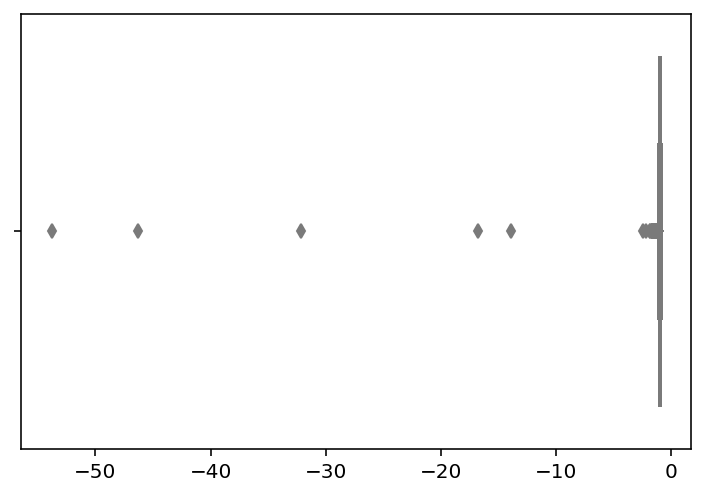

In [40]:
sns.boxplot(df_scores);

In [41]:
threshold=np.sort(df_scores)[9]
print(threshold)
df = df.loc[df_scores > threshold]
df = df.reset_index(drop=True)

-1.6477461947506211


In [42]:
df.shape

(9990, 17)

In [43]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,New_BalanceSalaryOranı,New_TenureByAge,New_CreditScoreGivenAge,New_NumOfProductsGivenAge,New_Age,New_CreditScore
0,528,France,Male,31,6,102016.72,2.0,0,0,80181.12,0,1.272328,0.193548,17.032258,0.064516,2,bad
1,497,Spain,Male,24,3,0.00,2.0,1,0,76390.01,0,0.000000,0.125000,20.708333,0.083333,2,bad
2,476,France,Female,34,10,0.00,2.0,1,0,26260.98,0,0.000000,0.294118,14.000000,0.058824,2,bad
3,549,France,Female,25,5,0.00,2.0,0,0,190857.79,0,0.000000,0.200000,21.960000,0.080000,2,bad
4,635,Spain,Female,35,7,0.00,2.0,1,1,65951.65,0,0.000000,0.200000,18.142857,0.057143,2,fair


In [44]:
cat_features = ['Geography','Gender',"New_CreditScore","New_Age"] 

In [45]:
df = pd.get_dummies(df, columns = cat_features, drop_first = True)

In [46]:
from sklearn.feature_selection import RFECV #Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.
from sklearn.ensemble import RandomForestRegressor

def select_features(X,y):
    # numerik olmayan degiskenlerin silinmesi
    X = X.select_dtypes([np.number]).dropna(axis=1)
    
    clf = RandomForestRegressor(random_state=46)
    clf.fit(X, y)
    
    selector = RFECV(clf,cv=10)
    selector.fit(X, y)
    
    features = pd.DataFrame()
    features['Feature'] = X.columns
    features['Importance'] = clf.feature_importances_
    features.sort_values(by=['Importance'], ascending=False, inplace=True)
    features.set_index('Feature', inplace=True)
    features.plot(kind='bar', figsize=(12, 5))
    
    
    best_columns = list(X.columns[selector.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    
    return best_columns

In [ ]:
best_features = select_features(X,y)
best_features

# Modeling 

# XGBoost - Base Model

In [48]:
y = df["Exited"]
X = df.drop('Exited', axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
#min_max_scaler = MinMaxScaler()

df[num_features] = std_scaler.fit_transform(df[num_features])

NameError: name 'num_features' is not defined

In [ ]:
# import XGBoost
#!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=12345)

In [27]:
xgb = XGBClassifier().fit(X_train,y_train)
y_pred = xgb.predict(X_test)

print("cross_val_score : ", cross_val_score(xgb, X_train, y_train, cv = 10).mean())


NameError: name 'X_train' is not defined

# Model Tuning

In [28]:
xgb_params = {"learning_rate": [0.1,0.01,0.5],
             "max_depth": [2,3,4,5,8],
             "n_estimators": [100,200,500,1000],
             "colsample_bytree": [0.4,0.7,1]}

In [29]:
xgb_rsc = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, n_iter=50, cv=10, scoring='accuracy', n_jobs=-1, verbose=2).fit(X,y)

NameError: name 'xgb' is not defined

In [30]:
xgb_rsc.best_params_

NameError: name 'xgb_rsc' is not defined

In [31]:
xgb_tuned = XGBClassifier(**xgb_rsc.best_params_).fit(X_train, y_train)

NameError: name 'xgb_rsc' is not defined

In [255]:
y_pred = xgb_tuned.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [258]:
print("cross_val_score : ", cross_val_score(xgb_tuned, X_train, y_train, cv = 10).mean())

cross_val_score :  0.8649893617021276


In [259]:
from sklearn.metrics import accuracy_score
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8654


# Cart

In [260]:
cart_model = DecisionTreeClassifier(random_state = 12345)
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [261]:
y_pred = xgb.predict(X_test)

print("cross_val_score : ", cross_val_score(cart_model, X_train, y_train, cv = 10).mean())

cross_val_score :  0.7920447434292865


# Model Tuning

In [81]:
cart_params = {"max_depth": [2,3,4,5,10,20, 100, 1000],
              "min_samples_split": [2,10,5,30,50,10]}

In [82]:
cart_model = DecisionTreeClassifier()

In [84]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 396 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 467 out of 480 | elapsed:   18.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   18.6s finished


In [85]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 2}

In [98]:
cart_tuned = DecisionTreeClassifier(**cart_cv_model.best_params_).fit(X_train, y_train)

In [99]:
y_pred = cart_tuned.predict(X_test)

In [100]:
print("cross_val_score : ", cross_val_score(cart_tuned,X_train, y_train, cv = 10, scoring='accuracy').mean())

cross_val_score :  0.8545009386733418


In [101]:
print('CART model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

CART model accuracy score: 0.8449


# Random Forests

In [262]:
rf_model = RandomForestClassifier(random_state = 12345).fit(X_train, y_train)

In [263]:
y_pred = rf_model.predict(X_test)

In [265]:
print("cross_val_score : ", cross_val_score(rf_model, X_train, y_train, cv = 10).mean())

cross_val_score :  0.8588593554443055


# Model Tuning

In [267]:
rf_params = {"max_depth": [5,8,10,None],
            "max_features": [2,5,10,15,17],
            "n_estimators": [100,200, 500, 1000],
            "min_samples_split": [2,5,10,20,30]}

In [268]:
rf_cv_model = RandomizedSearchCV(estimator= rf_model, param_distributions = rf_params, n_iter=50, cv=10, scoring='accuracy', n_jobs=-1, verbose=2).fit(X, y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 13.9min finished


In [269]:
rf_cv_model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'max_features': 17,
 'max_depth': 8}

In [270]:
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)

In [271]:
y_pred = rf_tuned.predict(X_test)

In [273]:
print("cross_val_score : ", cross_val_score(rf_tuned, X_train, y_train, scoring='accuracy', cv = 10, n_jobs=-1, verbose=2).mean())

cross_val_score :  0.8642387359198999
